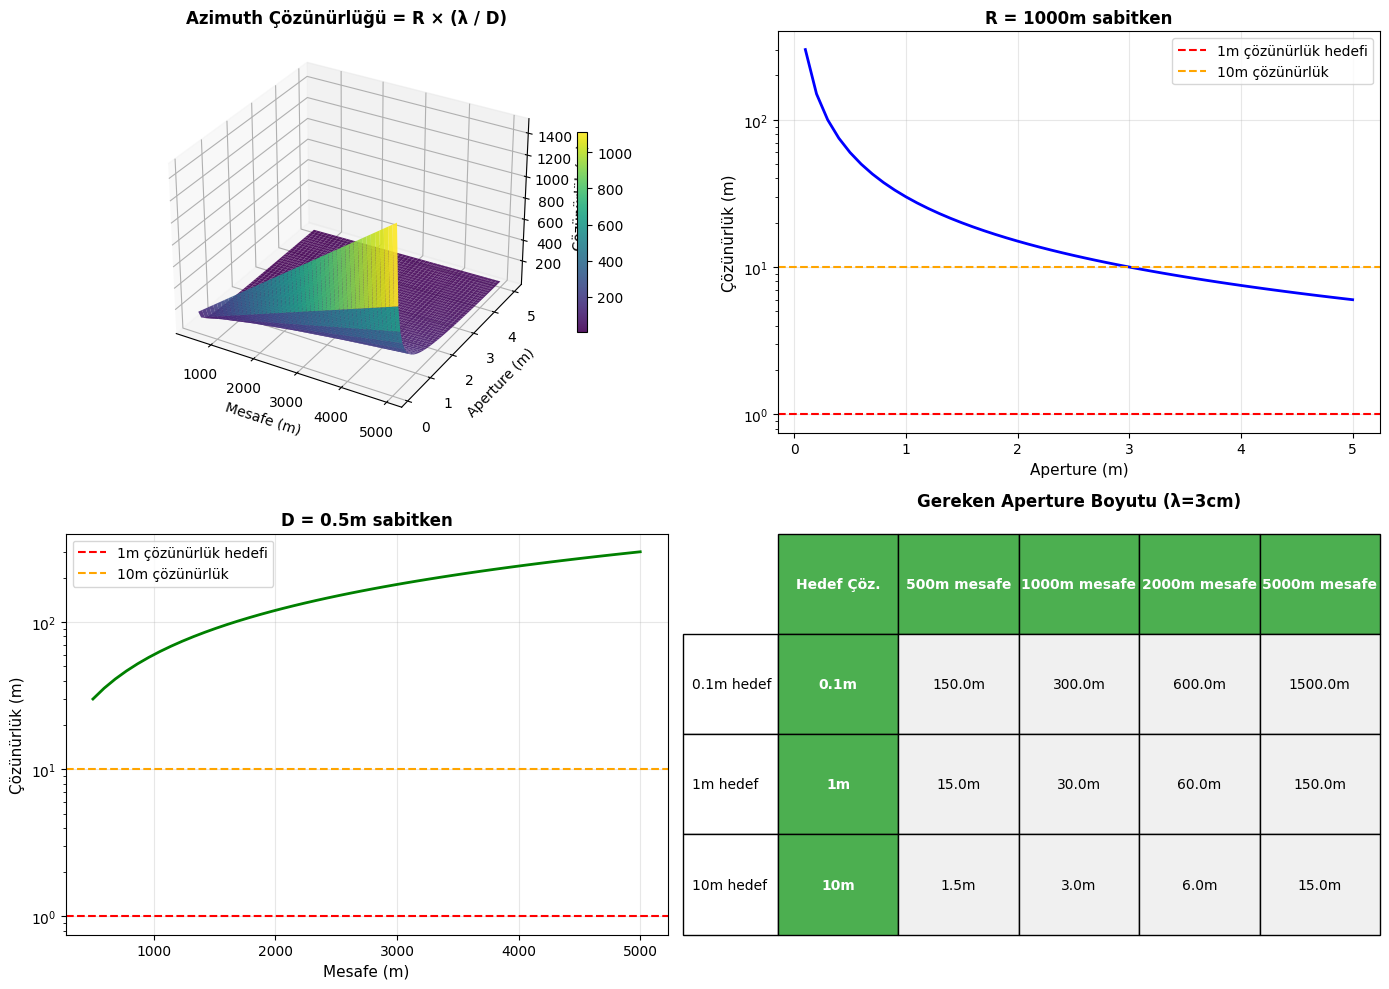


KRİTİK ÖRNEKLER:

Drone @ 1km, 1m çözünürlük:
  Gereken aperture: 30.00 metre
  → İMKANSIZ! Çok büyük anten gerekir.
  → SAR kullanmalısınız!

Uydu @ 500km, 1m çözünürlük:
  Gereken aperture: 15000.00 metre
  → İMKANSIZ! Çok büyük anten gerekir.
  → SAR kullanmalısınız!

Araba @ 100m, 10cm çözünürlük:
  Gereken aperture: 30.00 metre
  → İMKANSIZ! Çok büyük anten gerekir.
  → SAR kullanmalısınız!


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parametreler
lambda_c = 0.03  # 3 cm
R_values = np.linspace(500, 5000, 50)  # Mesafe
D_values = np.linspace(0.1, 5, 50)     # Aperture

# Mesh grid
R_mesh, D_mesh = np.meshgrid(R_values, D_values)

# Çözünürlük hesabı
resolution = R_mesh * (lambda_c / D_mesh)

# 3D plot
fig = plt.figure(figsize=(14, 10))

# 3D surface
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
surf = ax1.plot_surface(R_mesh, D_mesh, resolution, cmap='viridis', alpha=0.9)
ax1.set_xlabel('Mesafe (m)', fontsize=10)
ax1.set_ylabel('Aperture (m)', fontsize=10)
ax1.set_zlabel('Çözünürlük (m)', fontsize=10)
ax1.set_title('Azimuth Çözünürlüğü = R × (λ / D)', fontweight='bold')
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Sabit mesafede (R=1000m)
ax2 = fig.add_subplot(2, 2, 2)
R_fixed = 1000
resolution_fixed_R = R_fixed * (lambda_c / D_values)
ax2.plot(D_values, resolution_fixed_R, 'b-', linewidth=2)
ax2.axhline(1, color='r', linestyle='--', label='1m çözünürlük hedefi')
ax2.axhline(10, color='orange', linestyle='--', label='10m çözünürlük')
ax2.set_xlabel('Aperture (m)', fontsize=11)
ax2.set_ylabel('Çözünürlük (m)', fontsize=11)
ax2.set_title(f'R = {R_fixed}m sabitken', fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_yscale('log')

# Sabit aperture'de (D=0.5m)
ax3 = fig.add_subplot(2, 2, 3)
D_fixed = 0.5
resolution_fixed_D = R_values * (lambda_c / D_fixed)
ax3.plot(R_values, resolution_fixed_D, 'g-', linewidth=2)
ax3.axhline(1, color='r', linestyle='--', label='1m çözünürlük hedefi')
ax3.axhline(10, color='orange', linestyle='--', label='10m çözünürlük')
ax3.set_xlabel('Mesafe (m)', fontsize=11)
ax3.set_ylabel('Çözünürlük (m)', fontsize=11)
ax3.set_title(f'D = {D_fixed}m sabitken', fontweight='bold')
ax3.grid(True, alpha=0.3)
ax3.legend()
ax3.set_yscale('log')

# Gereken aperture tablosu
ax4 = fig.add_subplot(2, 2, 4)
ax4.axis('off')

target_resolutions = [0.1, 1, 10]  # metre
test_ranges = [500, 1000, 2000, 5000]  # metre

table_data = []
for target_res in target_resolutions:
    row = [f"{target_res}m"]
    for R in test_ranges:
        required_D = R * lambda_c / target_res
        row.append(f"{required_D:.1f}m")
    table_data.append(row)

table = ax4.table(cellText=table_data,
                  rowLabels=[f'{r}m hedef' for r in target_resolutions],
                  colLabels=['Hedef Çöz.'] + [f'{r}m mesafe' for r in test_ranges],
                  cellLoc='center',
                  loc='center',
                  bbox=[0, 0, 1, 1])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Başlık için
for i in range(len(target_resolutions) + 1):
    for j in range(len(test_ranges) + 1):
        cell = table[(i, j)]
        if i == 0 or j == 0:
            cell.set_facecolor('#4CAF50')
            cell.set_text_props(weight='bold', color='white')
        else:
            cell.set_facecolor('#f0f0f0')

ax4.set_title('Gereken Aperture Boyutu (λ=3cm)', 
             fontweight='bold', fontsize=12, pad=20)

plt.tight_layout()
plt.show()

# Kritik örnekler
print("\n" + "="*80)
print("KRİTİK ÖRNEKLER:")
print("="*80)

examples = [
    ("Drone @ 1km, 1m çözünürlük", 1000, 1.0),
    ("Uydu @ 500km, 1m çözünürlük", 500000, 1.0),
    ("Araba @ 100m, 10cm çözünürlük", 100, 0.1),
]

for desc, R, target_res in examples:
    required_D = R * lambda_c / target_res
    print(f"\n{desc}:")
    print(f"  Gereken aperture: {required_D:.2f} metre")
    if required_D > 10:
        print(f"  → İMKANSIZ! Çok büyük anten gerekir.")
        print(f"  → SAR kullanmalısınız!")
    elif required_D > 2:
        print(f"  → ZOR! Büyük anten gerekir.")
    else:
        print(f"  → Mümkün, gerçek aperture kullanılabilir.")

print("="*80)